          [,1]
[1,] 2.1349704
[2,] 0.2959195


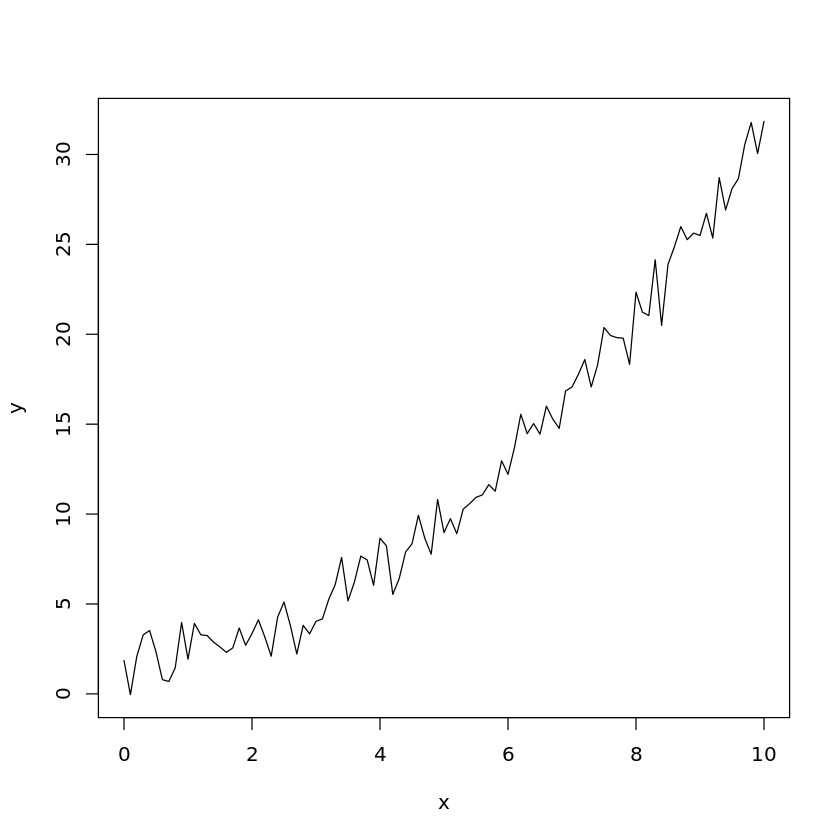

[1] 104.3957


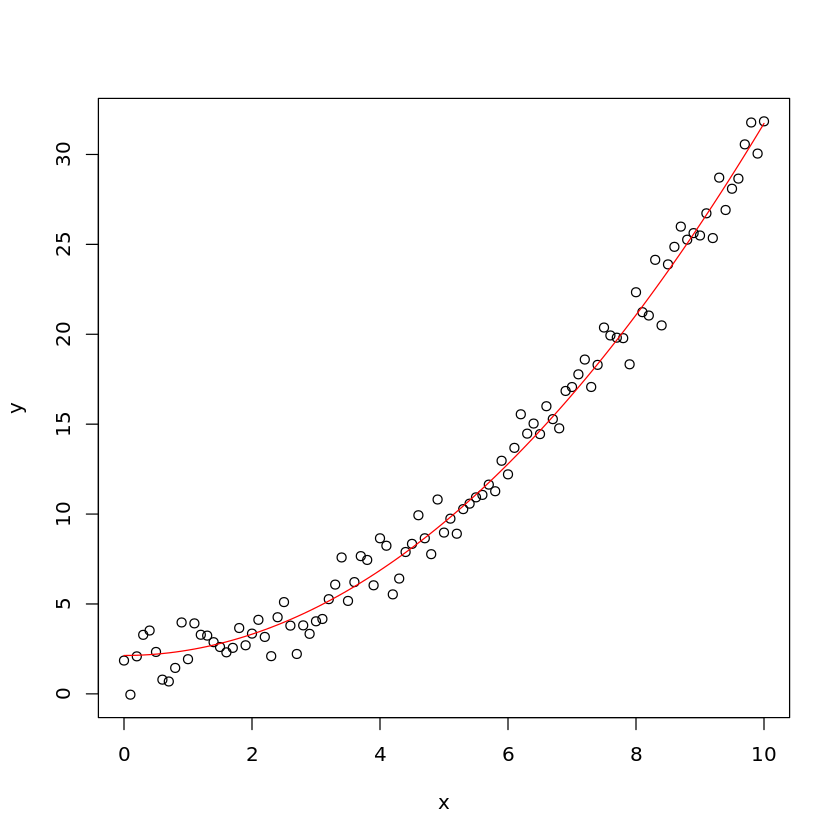

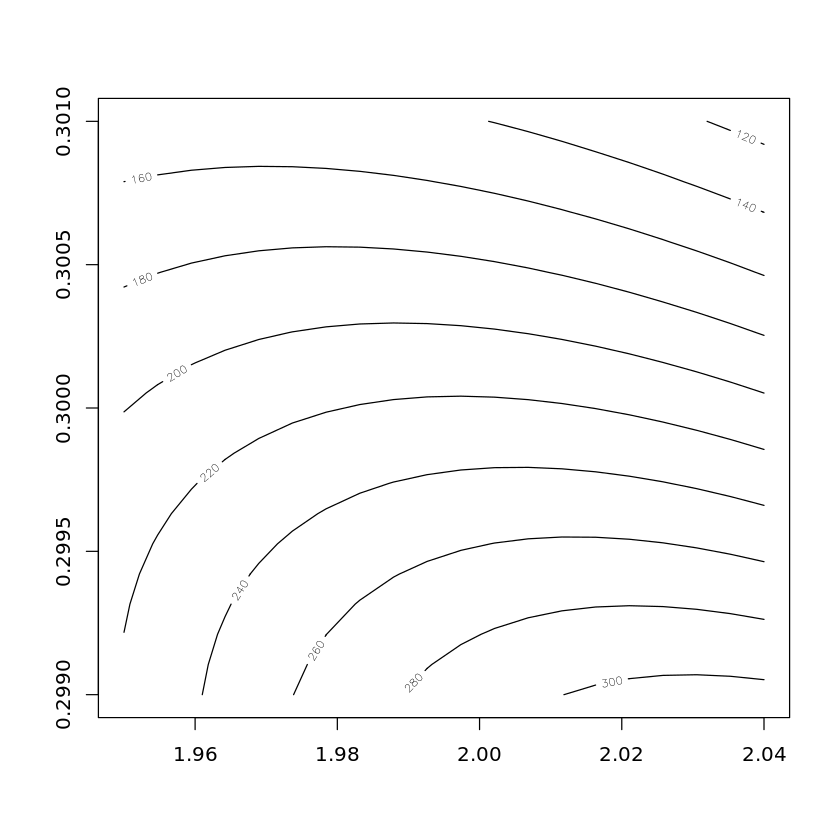

[1] "CI Grpah"

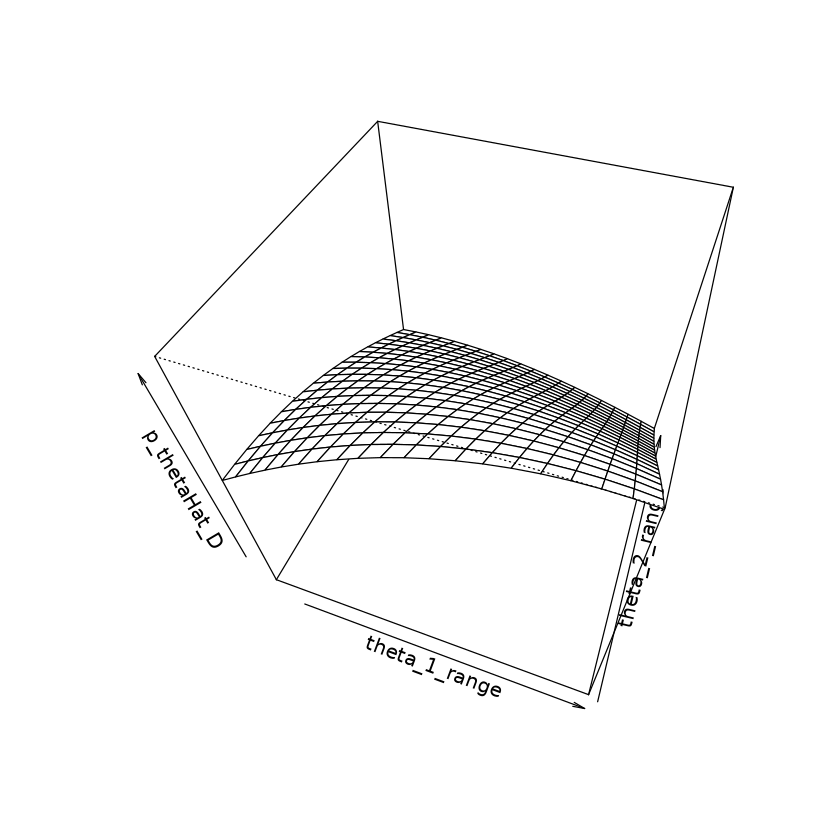

[1] "asdf"

         [,1]
[1,] 2.130265
[2,] 0.295997


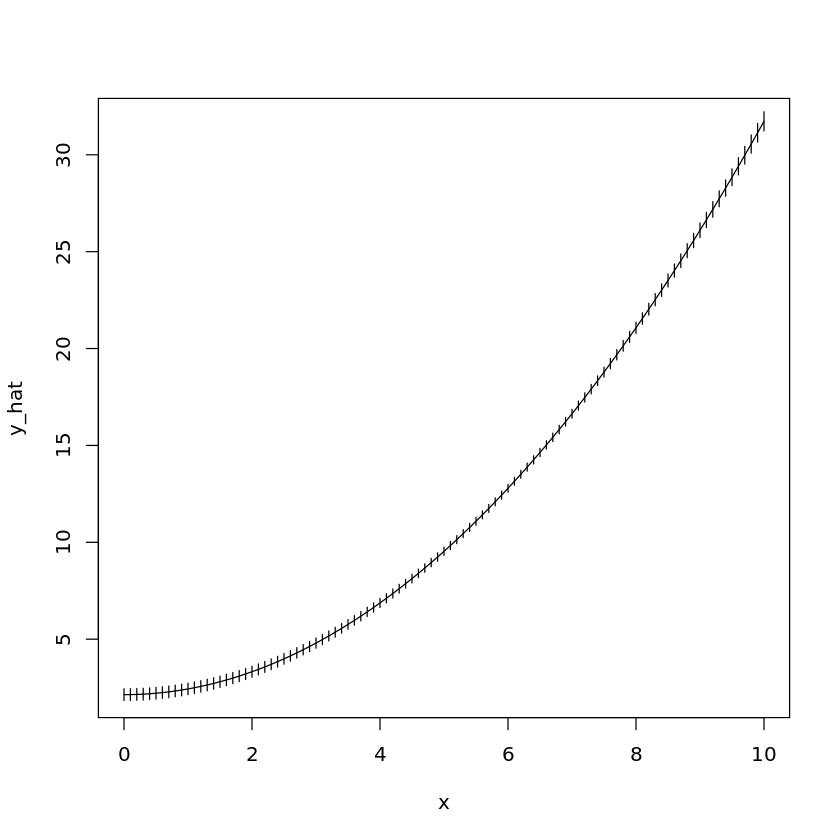

[1] 10.21747


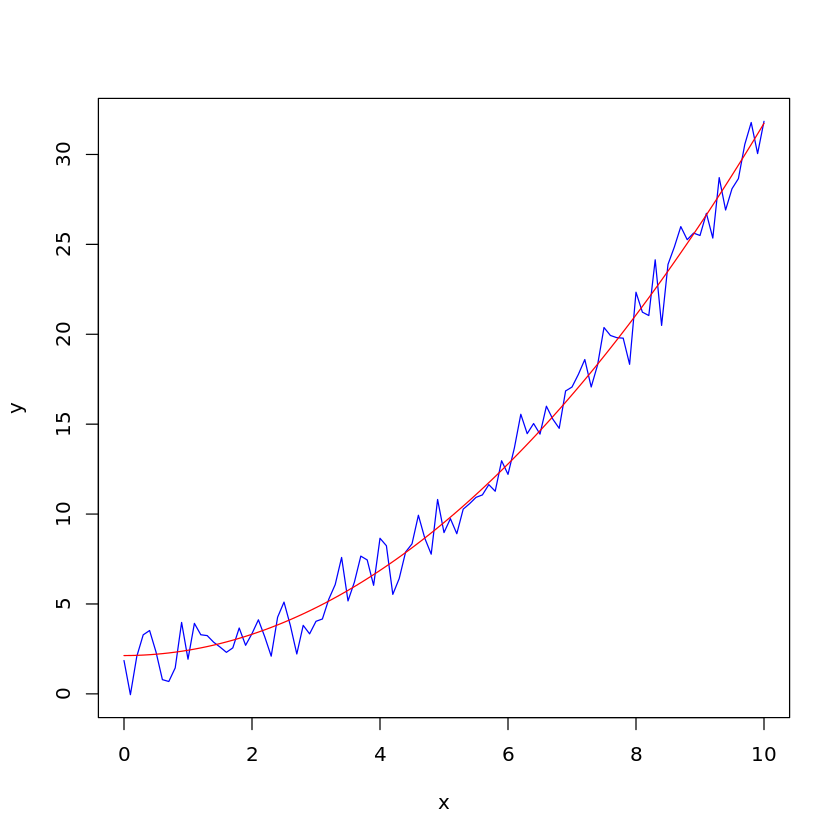

In [2]:

#----------------------------------------
#--------------- Ex 1 -------------------
#----------------------------------------
x = seq(0,10, by=0.1)
n = length(x)
number_of_parameters = 2
x = matrix(x)

y = 2 + 0.3*(x^2) 

y = y + rnorm(length(y), mean=0, sd = 1)

plot(x,y, type="l")

ones = matrix(1 , n , 1)
x2 = matrix(x^2) 

X = cbind(ones, x2)
thetaHat = solve(t(X) %*% X) %*% t(X) %*% y

print(thetaHat)

y_hat = X %*% thetaHat

plot(x,y)
lines(x,y_hat, col="red")

error = y - y_hat

sse = norm(error , type = "2")^2
print(sse)
#---------------------------------------

#theta = matrix(c(2,0.3) , number_of_parameters , 1)
sigma_2 = sse/( n - 1 ) # error variance sigma^2

cov_thetaHat = sigma_2 * (solve(t(X) %*% X))
cov_thetaHat_inv = (t(X) %*% X) * (1/sigma_2) # inverse of cov_thetaHat
det_cov_thetaHat = det(cov_thetaHat) # determinent of cov_thetaHat

no_points = 20 # no point on the plot
theta_1_range = seq(1.95 , 2.04 , length=no_points)
theta_2_range = seq(0.299 , 0.301 , length=no_points)

p_thetaHat_D = matrix(0 , no_points , no_points)

for(r in 1:20){
  for(c in 1:20){
    
    theta_12 = matrix( c( theta_1_range[r] , theta_2_range[c] ) , number_of_parameters , 1)
    thetaHat_theta = theta_12 - thetaHat
    
    p_thetaHat_D[r,c] = ( 1/sqrt( ( (2*pi)^number_of_parameters ) * det_cov_thetaHat) ) * 
      exp( -0.5 * t(-thetaHat_theta) %*% cov_thetaHat_inv %*% -thetaHat_theta )
    
  }
}

contour(theta_1_range, theta_2_range, p_thetaHat_D)
persp(theta_1_range, theta_2_range, p_thetaHat_D , theta = 20 , phi = 50) # theta changes the rotation (left-right), phi changes the rotation (up-down)


#----------------------------------------
#--------------- Ex 2 -------------------
#----------------------------------------


var_y_hat = matrix(0 , n , 1)

for( i in 1:n){
  X_i = matrix( X[i,] , 1 , number_of_parameters ) # X[i,] creates a vector. Convert it to matrix
  var_y_hat[i,1] = X_i %*% cov_thetaHat %*% t(X_i) # same as sigma_2 * ( X_i %*% ( solve(t(X) %*% X)  ) %*% t(X_i) )
}

CI = 2 * sqrt(var_y_hat) # Confidence interval

paste("CI Grpah")

plot(x, y_hat , type = "l")
segments(x, y_hat-CI, x, y_hat+CI) # Adds error bars to the indivigual data points

paste("asdf")





#----------------------------------------
#--------------- Ex 3 -------------------
#----------------------------------------

I = diag(number_of_parameters) # Identity matrix 
lambda = 0.1 # Try for different lambda values
thetaHat = solve( (t(X) %*% X) + lambda*I) %*% t(X) %*% y

y_hat = X %*% thetaHat

print(thetaHat)

plot(x,y, type = "l" , col="blue")
lines(x,y_hat, col="red")

error = y - y_hat

sse = norm(error , type = "2")
print(sse)


In [5]:
str(x) 
str(y_hat)

 num [1:101, 1] 0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 ...
 num [1:101, 1] 2.1 2.1 2.11 2.13 2.15 ...
